In [1]:
import numpy as np

In [2]:
# sigmoid 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
x = np.array([-1.0, 1.0, 2.0])

In [4]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

In [6]:
import matplotlib.pyplot as plt

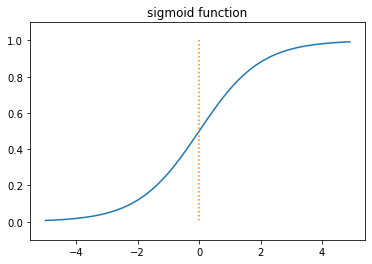

In [7]:
plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.ylim(-0.1, 1.1)
plt.title('sigmoid function')
plt.show()

In [8]:
# relu 함수
def relu(x):
    return np.maximum(0, x)

In [9]:
x = np.arange(-2.0, 2.0, 0.2)

In [10]:
x

array([-2.0000000e+00, -1.8000000e+00, -1.6000000e+00, -1.4000000e+00,
       -1.2000000e+00, -1.0000000e+00, -8.0000000e-01, -6.0000000e-01,
       -4.0000000e-01, -2.0000000e-01, -4.4408921e-16,  2.0000000e-01,
        4.0000000e-01,  6.0000000e-01,  8.0000000e-01,  1.0000000e+00,
        1.2000000e+00,  1.4000000e+00,  1.6000000e+00,  1.8000000e+00])

In [11]:
y = relu(x)

In [12]:
y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4,
       0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

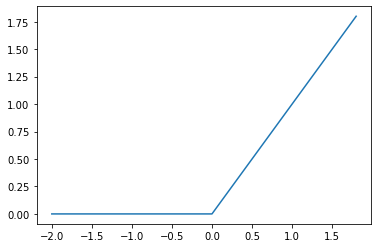

In [13]:
plt.plot(x, y)

In [14]:
# 행렬의 합
a = np.array([1, 2, 3, 4])

In [15]:
a

array([1, 2, 3, 4])

In [16]:
b = np.array([[1, 2, 3, 4], [3, 4, 5, 6], [5, 6, 7 ,8], [7, 8, 9, 10]])

In [17]:
b

array([[ 1,  2,  3,  4],
       [ 3,  4,  5,  6],
       [ 5,  6,  7,  8],
       [ 7,  8,  9, 10]])

In [18]:
print(a.shape)
print(b.shape)

(4,)
(4, 4)


In [19]:
np.dot(b, a)

array([30, 50, 70, 90])

In [20]:
np.dot(a, b)
# 순서가 바뀌면 다른 값이 나온다.
# 행렬 곱을 위해서는 a x b 행렬과 c x d 행렬을 곱할 때
# b == c가 되어야 한다.
# shape 값이 (4, ) 라면 1x4 행렬이다. 반대라고 생각하자

array([50, 60, 70, 80])

In [21]:
# 신경망에서의 내적
# input feature
X = np.array([1, 2])
X.shape

(2,)

In [22]:
# weight W, w1 == weight of x1, w2 == weight of x2
# [w1, w2]
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape

(2, 3)

In [23]:
# 내적을 구한다.
# output인 y1, y2, y3 로 이루어진 행렬이 나온다.
np.dot(X, W)

array([ 5, 11, 17])

In [24]:
# 신경망 구현하기
# X = input, W1 = weight, B1 = bias
# first layer
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [25]:
print(W1.shape) # 3x2 matrix
print(X.shape) # 1x2 matrix
print(B1.shape) # 1x3 matrix

(2, 3)
(2,)
(3,)


In [26]:
# 계산
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [27]:
# 활성함수 적용 (sigmoid)
Z1 = sigmoid(A1)

In [28]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [29]:
# second layer
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [30]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [31]:
A2 = np.dot(Z1, W2) + B2

In [32]:
A2

array([0.51615984, 1.21402696])

In [33]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [34]:
# 원래라면 softmax 함수를 많이 사용하는것 같음
# 여기는 예시라서 그냥 return 하는 함수 사용
def identity_function(x):
    return x

In [35]:
# 출력층 계산
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [36]:
A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [37]:
Z3 = identity_function(A3)
Z3

array([0.31682708, 0.69627909])

In [38]:
# 전체적인 신경망 구성
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([[0.1,0.2]])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([[0.1,0.2]])
    return network

# 학습 함수
def foward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y


In [39]:
network = init_network()

In [40]:
network

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'b1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'b2': array([[0.1, 0.2]]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'b3': array([[0.1, 0.2]])}

In [41]:
# train dataset
x = np.array([1.0, 0.5])

In [42]:
# predict output
y = foward(network, x)

In [43]:
y

array([[0.31682708, 0.69627909]])

In [71]:
# softmax function
# 0과 0.1 사이의 실수를 출력하며 전체 결과값의 합이 1이기 때문에
# 출력값을 '확률'로 해석하기도한다.
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [69]:
# 학습 함수 with softmax function
def foward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [46]:
y = foward(network, x)
y

array([[0.40625907, 0.59374093]])

In [47]:
# 실제데이터로 구현해보기
import tensorflow as tf
import numpy as np
from PIL import Image
import pickle

In [87]:
# 데이터를 불러오는 함수
def get_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    return x_test, y_test

# 데이터를 이미지화 해주는 함수
def img_show(img):
    img = img.reshape(28, 28)
    return Image.fromarray(np.uint8(img))

In [63]:
def init_network():
    # 학습이 완료된 가중치 샘플을 가져와서 네트워크를 만든다.
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

In [85]:
x, t = get_data()
network = init_network() # 위에 만든 neural network 를 가져온다
accuracy_cnt = 0
for i in range(len(x)):
    y = foward(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print(accuracy_cnt)

[7 2 1 ... 4 5 6]


c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


9207


In [75]:
img_show(x[1])

In [88]:
# batch
x, _ = get_data()

In [89]:
network = init_network()

In [90]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [93]:
print(W1.shape, W2.shape, W3.shape)

(784, 50) (50, 100) (100, 10)


In [97]:
# batch 적용
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = foward(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
print(accuracy_cnt)

9207


c:\users\visitor.slsi\desktop\ml\mlenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
